<a href="https://colab.research.google.com/github/Sau05678/bank_marketing/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bank Marketing Effectiveness Prediction



##### **Project Type**    - Classification Project
##### **Contribution**    - Individual
##### **Team Member  -** - Saurav Kumar


# **Project Summary -**
In summary, effective communication, personalization, compliance,Imbalance class handling, customer feedback, and competitive analysis are key strategies to engage stakeholders in the banking and marketing domain.By leveraging the predictive models and understanding the key predictors, stakeholders can enhance customer acquisition and retention strategies, leading to improved business outcomes.Overall, this project's findings provide stakeholders with valuable information and actionable insights to improve marketing effectiveness, customer targeting, and overall decision-making in the banking and marketing context. By leveraging the predictive models and understanding the key predictors, stakeholders can enhance customer acquisition and retention strategies, leading to improved business outcomes.

# **GitHub Link -**

https://github.com/Sau05678/bank_marketing

# **Problem Statement**

*This Data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe to a term deposit (variable y).*

### Dataset Information

The given dataset contains information from a marketing campaign, and it consists of 45,211 entries (rows) and 16 columns. Here is a brief description of each column:

1. **Education:** Education level of the individual (object/string).
2. **Marital:** Marital status of the individual (object/string).
3. **Day:** Day of the month when the last contact was made (integer).
4. **pdays:** Number of days that passed by after the last contact from a previous campaign (integer).
5. **month:** Month of the year when the last contact was made (object/string).
6. **age:** Age of the individual (integer).
7. **contact:** Communication contact type (object/string).
8. **balance:** Balance of the individual's bank account (integer).
9. **job:** Occupation or job category of the individual (object/string).
10. **loan:** Indicates if the individual has a personal loan (object/string).
11. **housing:** Indicates if the individual has a housing loan (object/string).
12. **default:** Indicates if the individual has credit in default (object/string).
13. **poutcome:** Outcome of the previous marketing campaign (object/string).
14. **y:** Target variable, indicating if the individual subscribed to the product/service (object/string).
15. **campaign:** Number of contacts performed during this campaign for this individual (integer).
16. **previous:** Number of contacts performed before this campaign for this individual (integer).

The dataset does not contain any missing values (non-null count is equal to the total number of entries for each column). The data types of the columns are either integers (int64) or objects (strings).

## **In this project tasks required to do are:**

* Efficient EDA
* Feature Engineering
* Evaluation while keeping class imbalance
* Model Implementation
* Model evaluation
* Feature Importance and Conclusion


# ***Let's Begin !***

##Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#import pylab as plb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading Data
df = pd.read_csv('/content/bank-full.csv', sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### *Descriptive Statistics*

In [ ]:
# statistical analysis of data
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


We can see some extreme values in various features like age, balance, campaign. they need to be treated accordingly.

In [ ]:
# chcking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


null values are not presented in data, which means we can go further.

## Exploratory Data Analysis

In [ ]:
# Storing categorcial columns in a list
cat_col = [col for col in df.columns if df[col].dtype== object]

# checking unique categories for each categorical feature and their counts
for i in cat_col:
  print(df[i].value_counts())
  print('------------')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------
no     44396
yes      815
Name: default, dtype: int64
------------
yes    25130
no     20081
Name: housing, dtype: int64
------------
no     37967
yes     7244
Name: loan, dtype: int64
------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
------------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
-------

We got 'unknown' values, they needs to be treated very well at the time of cleanig .

#### To convert month names to month numbers for better processes.

In [ ]:
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

df['month_int'] = df['month_int'].astype(int)

df.drop('month', axis=1, inplace=True)

## **Exploratory Data Analysis**

### *Need to check Class of Target feature variable*

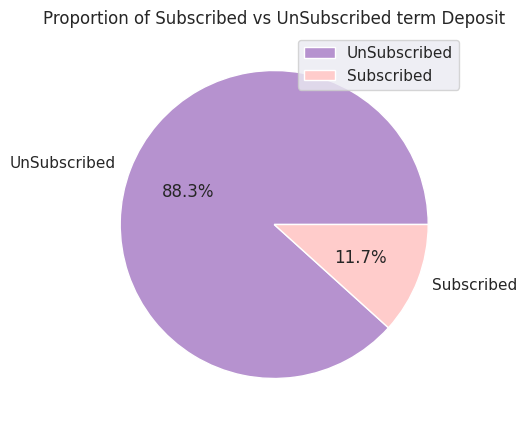

In [ ]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['y'].value_counts()
labels = ['UnSubscribed','Subscribed']
plt.title('Proportion of Subscribed vs UnSubscribed term Deposit')
plt.pie(proportion, labels=labels,
        autopct = '%1.1f%%', colors =['#B692CF','#FFCCCB'])

plt.legend()
plt.show()

This has a highly imbalanced classes with approx ratio of 8:1, necessary steps to be taken to balance classes before input in model.

### *Which age group is more focus by marketing team*

Text(0.5, 1.0, 'Age Distribution')

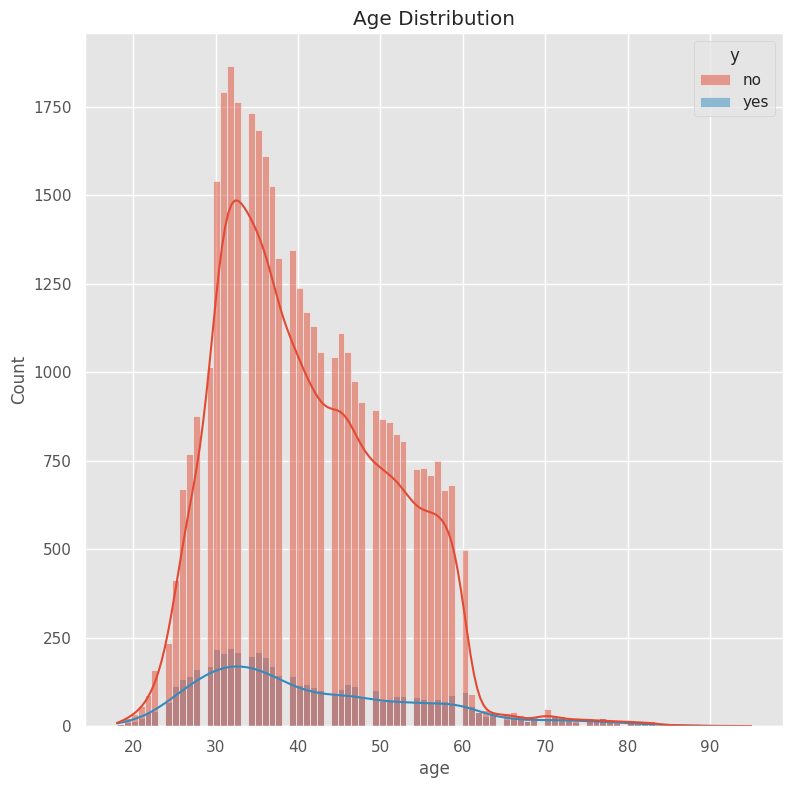

In [ ]:
# plotting histogram for age distribution
plt.style.use('ggplot')
sns.histplot(data=df, x="age",hue='y', color='#DAF7A6' ,bins='auto', kde=True)
plt.title('Age Distribution')

From above graph we observed that, marketing team focusing from age 20 to 55 and specially focusing on age group 27 to 40, and that makes sense as peoples belongs to this age have most probability to subscribe, given by data that most of 'yes' (subscribed) is between 26-40 age group.

### *Job with respect to Subscription, Default credit, House loan and Personal loan*

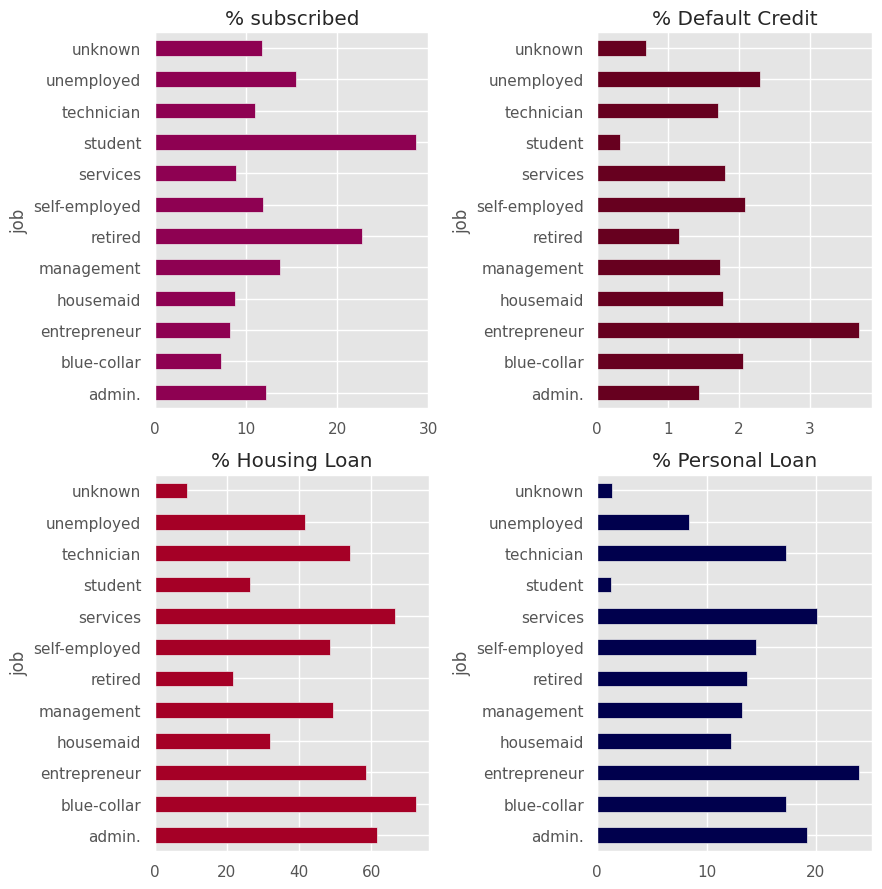

In [ ]:

# finding the percentage of subscription, default credits, house loan and personal loan and assigning on different dataframes
job_on_y = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_y = job_on_y.transpose()

job_on_d = pd.crosstab(df['default'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_d = job_on_d.transpose()

job_on_h = pd.crosstab(df['housing'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_h = job_on_h.transpose()

job_on_l = pd.crosstab(df['loan'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_l = job_on_l.transpose()


# defining subplots of 2*2
fig, ax = plt.subplots(2,2)

#plotting 'yes' percentage of the given features
job_on_y['yes'].plot(kind='barh', ax= ax[0,0], colormap='PiYG')
job_on_d['yes'].plot(kind='barh', ax= ax[0,1], colormap='RdGy')
job_on_h['yes'].plot(kind='barh', ax= ax[1,0], colormap='RdYlGn')
job_on_l['yes'].plot(kind='barh', ax= ax[1,1], colormap='seismic')


# setting title for each plot
ax[0,0].set_title('% subscribed')
ax[0,1].set_title('% Default Credit')
ax[1,0].set_title('% Housing Loan')
ax[1,1].set_title('% Personal Loan')

plt.tight_layout() # for adjustment of plots


* Highest default credits rate are Entrepreneur followed by self-employed and unemployed.
* Highest subscription rate for Student followed by Retired, Unemployed and Management compare to others.
* Entrepreneurs has high personal loan rate followed by Services, technician, admin and Blue-collar.
*  highest housing loan rate are for Blue-collar profession followed by Services, admin., technician and Entrepreneurs.

### *who is the most business doing profession by marketing team*

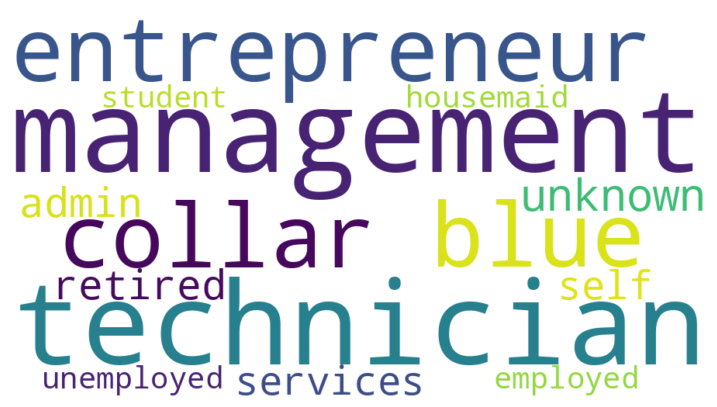

In [ ]:
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 9, 9

# Adding all the words in topics into the text as a string to pass in the Word Cloud.
text = '+'.join(df['job'].unique())

# Creating a WordCloud object and assigning parameters
wordcloud = WordCloud(width=900, height=500, random_state=1, background_color="white", colormap="viridis")  # Change colormap to "viridis" or any other colormap you like

# Generating Word Cloud by its object
wordcloud.generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




* most business doing profession are Managemet and Technicians are .
* From the least contacted jobs like students, unemployed, retired are more likely to subscribe (from above analysis).
* Marketing personals needs to increase campaigns for students retired and unemployed profiles.    

### *comparison between Marital status to subscription and education to subscription*

<Figure size 800x1200 with 0 Axes>

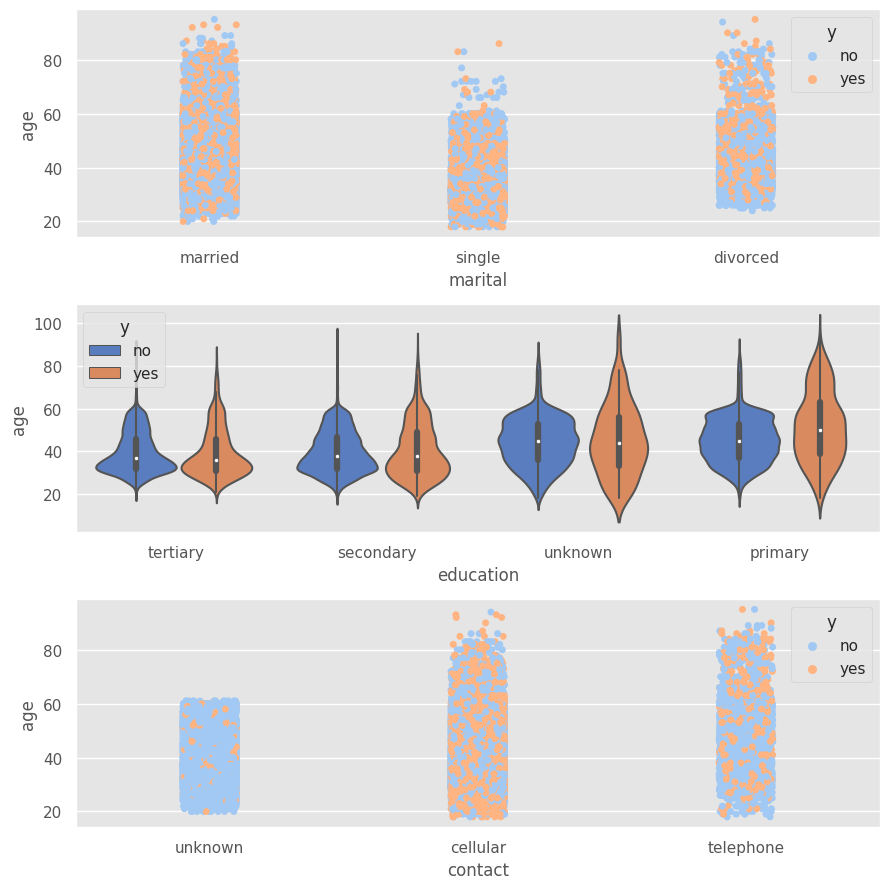

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting size and subplots
plt.figure(figsize=(8, 12))
fig, ax = plt.subplots(3)

# plotting 2 plots, marital and education with relation to subscription on age basis
sns.stripplot(x='marital', y='age', data=df, hue='y', palette='pastel', ax=ax[0])
sns.violinplot(x='education', y='age', data=df, hue='y', palette='muted', ax=ax[1])
sns.stripplot(x='contact', y='age', data=df, hue='y', palette='pastel', ax=ax[2])

plt.tight_layout()
plt.show()


From the above plots we can conclude that:
* Married people are more likely for subscription, and divorced are least likely.
* In terms of education, Unknown and primary educated clients have random pattern of subscription, maybe depend on other factor but  secondary and tertiary educated are more likely to subscribe.
* Clients contacted through cellular mode are more likely to subscribe then telephone.

### *Reation between Balance and age of client w.r.t. to subscriptions*

<Axes: xlabel='age', ylabel='balance'>

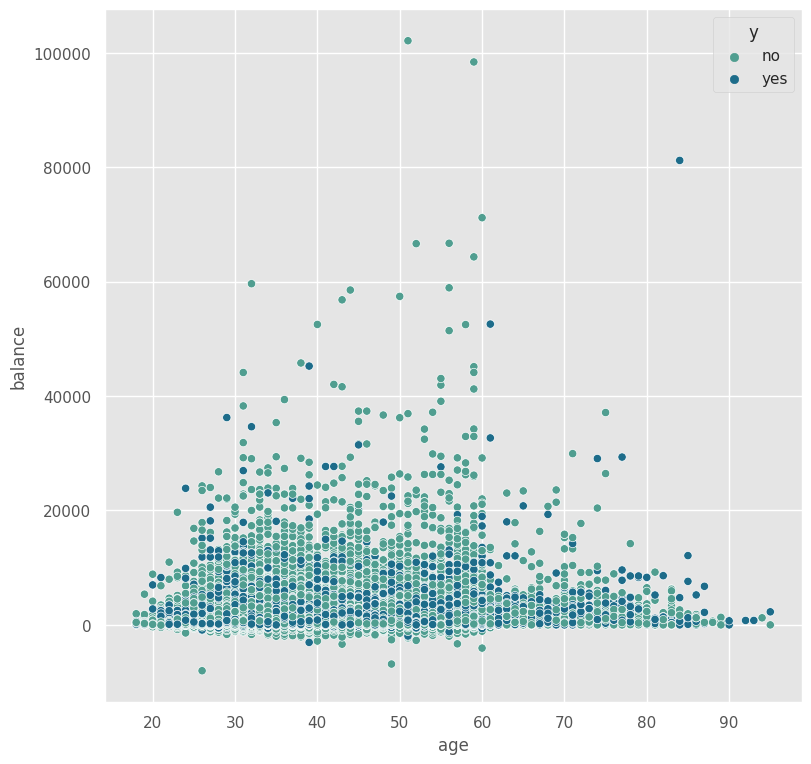

In [ ]:
#plotting scatterplot for analysing relation on dependent variable
sns.scatterplot(data=df, y= 'balance', x='age',
                hue='y', palette= 'crest')

* Not a clear relation with age and balance of holders, but we notice that after age 60 balance is less than 5000 euros.
* clients whose balance is under 15000 euros are more likely to subscribe.
* Also, we see that even if age is above 60 with low balance but they are still more likely to subscribe.

### *Analysing housing and personal loan impact on subscription rat*e.

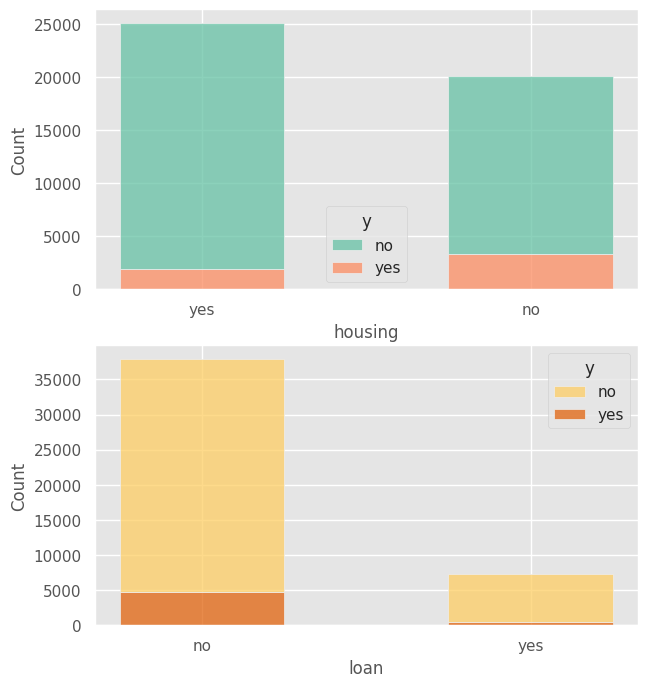

In [ ]:
#   adjusting the size
rcParams['figure.figsize'] = 7,8
# creatung subplots
fig, ax = plt.subplots(2)

# plotting the histograms of the counts with respect to subscription
sns.histplot(df, x='housing', hue='y', multiple='stack', shrink=0.5, ax=ax[0], palette='Set2')
sns.histplot(df, x='loan', hue='y', multiple='stack', shrink=0.5, ax=ax[1], palette='YlOrBr')
plt.show()

* When a client has no housing loan then chances of subscribtion rises.
* when a client has no personal loan then he is more likely to subscribe.

### *Measuring Month-wise Subscription rate and client contacting rate*

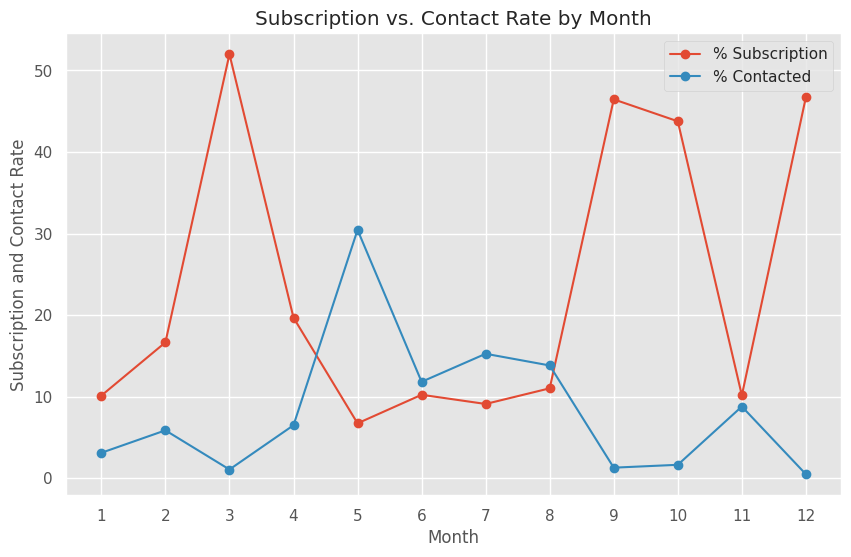

In [ ]:
df_n = df.copy() #making a copy to make sure original data not gets tampered

#getting the percentage of subscription w.r.t. to months
count_month_response_pct = pd.crosstab(df_n['y'],df_n['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

#getting contacting percentage month wise
month = pd.DataFrame(df_n['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

# plotting the line chart for analysing the trend
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

# adding titles and labels
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

plt.show()

*  Bank contacted most of clients between May and August. and highest contacting percentage is 30% which is in May.
* contacted rate is almost 0 in march, september, october, december.
* Subscription rate showed a different story, highest subscription rate is in march i.e. over 50%.
*subscription rates in September, October, and December are over 40%.

Contacting rate and subscription rate is moving in different direction, and highly reflects the inappropriate timings for campaign, to improve this, bank's campaign should focus on months which shows us higher subscription rate.

### *Relation between number of calls vs duration of calls (in minutes) w.r.t. subscription*

Before plotting we need to made some changes in duration and filter some unimportant values without changing original data.

In [ ]:
# Change the unit of 'duration' from seconds to minutes
df_n['duration'] = df_n['duration'].apply(lambda n:n/60).round(2)


# Drop rows that 'duration' < 5s
cndtn = (df_n['duration']<5/60)
df_n = df_n.drop(df[cndtn].index, axis = 0, inplace = False)

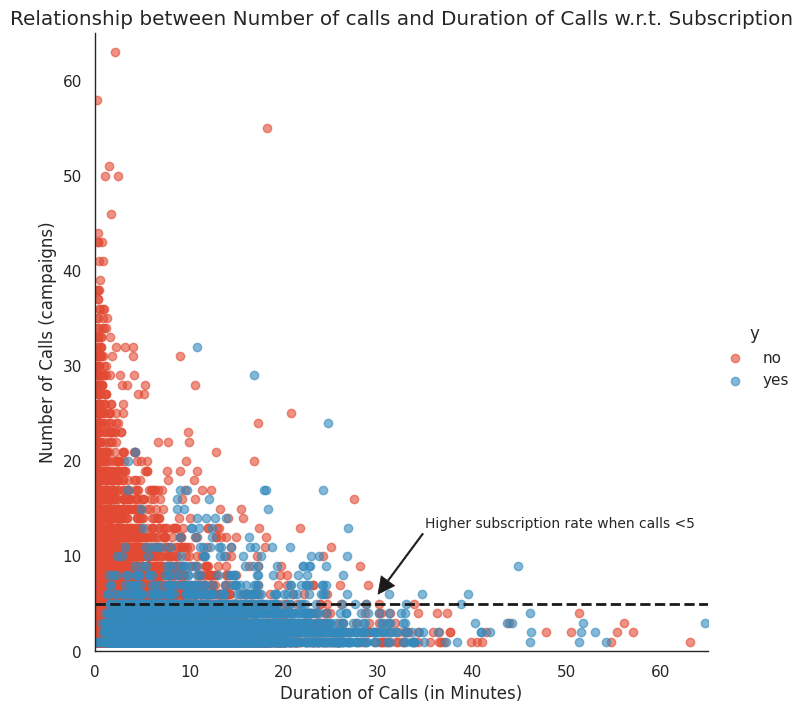

In [ ]:
# setting style
sns.set_style("white")

# plotting the scatterlot as lmplot
plot = sns.lmplot(x='duration', y='campaign',
                     data = df_n, hue = 'y',
                     fit_reg = False, scatter_kws={'alpha':0.6},
                     height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls (campaigns)')
plt.xlabel('Duration of Calls (in Minutes)')
plt.title('Relationship between Number of calls and Duration of Calls w.r.t. Subscription')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

* This tells us some interesting insight, increasing number of calls will not make customer to subscribe, but calls made <5 times has high subscription rate.   

### *Relation of pdays on the subscription rate and contact rate during this campaign*

<Axes: xlabel='y', ylabel='pdays'>

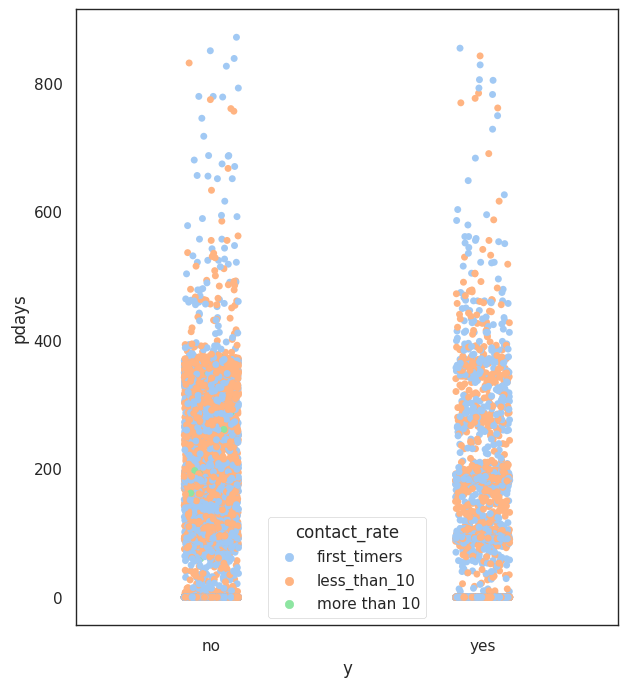

In [ ]:
# definig fucntion to categorise values with times contacted during a campaign.
def rate_calc(x):
  if x == 1:
    return 'first_timers'
  elif x <= 10:
    return 'less_than_10' # 10 included

  else:
    return 'more than 10'


# replacing -1 (not contacted previously) with 0
df_n['pdays'] = df_n['pdays'].replace({-1:0})
#new column as contact rate as first call, less than 10 calls and more than 10 calls during this campaign
df_n['contact_rate'] = df_n['campaign'].apply(rate_calc)

sns.stripplot(data=df_n, x='y', y='pdays', hue='contact_rate', palette='pastel')

* Surely there could not be waiting time of more than 400 days since last contacted, to ensure that the client will not be out of the funnel.
* We see quite high subscription rate when pdays are from 10 to 200 days.
* There's a balance between first call during campaign and less than 10 calls during campaign, but more than 10 calls is not effective way.

### *Distribution of numerical features*

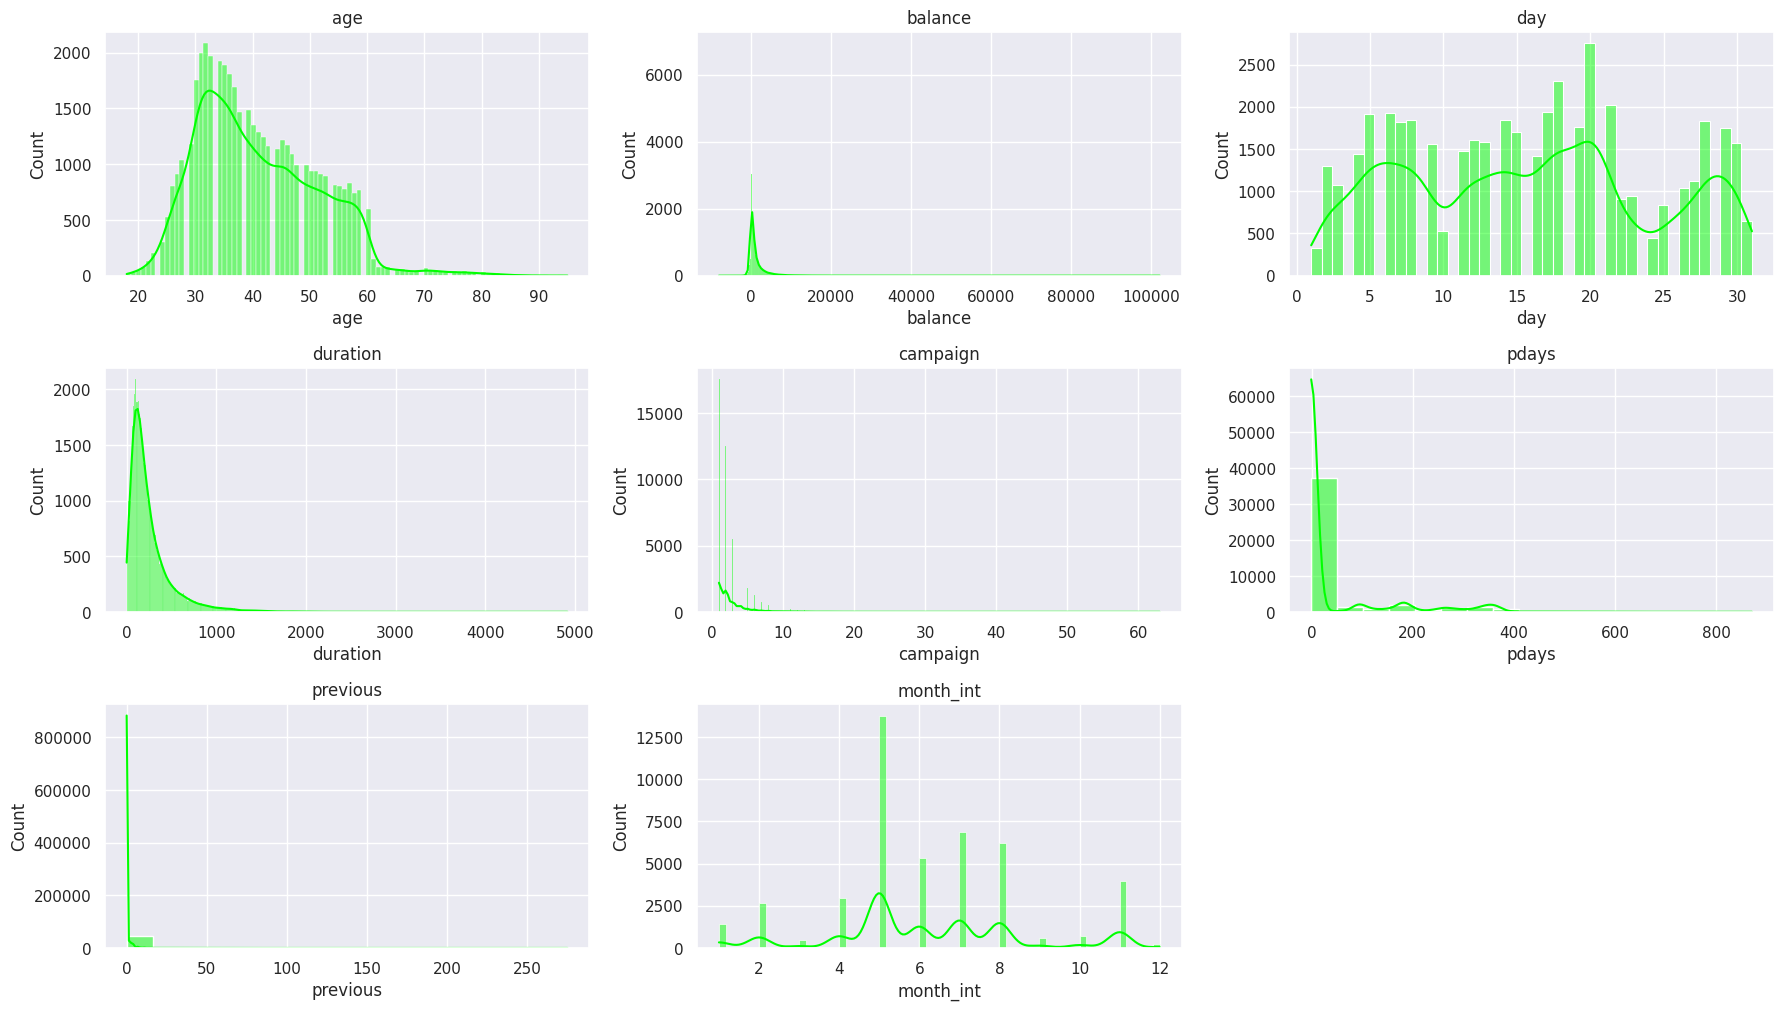

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})

# list of all numerical columns from data
num_col = ['age', 'balance', 'day', 'duration','campaign', 'pdays',	'previous', 'month_int']

n=1
plt.figure(figsize=(18,40))
for i in num_col:
  plt.subplot(12,3,n)
  n= n+1
  sns.histplot(df[i],color='lime', kde=True)
  plt.title(i)
  plt.tight_layout()

Some of the features shows a constant line because they have major values within the single bracket and hence may not be useful for our model, we will decide it further in feature importance and selection process.

## **Data Cleaning**

### *Missing value treatment*

Although there are no missing values or nulls in data, yet there is something which is more or less similar to missing data, some features values are shown "unknown", we're going to analyse these values and figuring out what needs to be done to tackle this.

In [ ]:
## getting the counts of unknown values to capture the information if the missing values are at random or is there
## a pattern in the missing values.

# a dictionay to store data
total_dict={}
un_cat_variables = ['education','job','poutcome','contact']
for col in un_cat_variables:
  total_dict[col] = len(df[df[col]=='unknown']) # storing count of unknown values in dictionary

# converting dictionary to series
print('Total unknown values by features:\n')
pd.Series(total_dict)

Total unknown values by features:



education     1857
job            288
poutcome     36959
contact      13020
dtype: int64

There's no such relation in unknown values, so we need treat them independently.
* unknown values of job feature can be filled with 'other' category.
* education unknown can also be filled as "other".
* poutcome has "unknown" because if a client is not contacted previousluy, its outcome will be "unknown" so we can rename it as "nonexistant" and values as "other" also as non existant
* for contact feature we can also change this to "other" then it will be easier for further processing.

In [ ]:
# replacing "unknown" with "other"
df['job'].replace('unknown', 'other', inplace=True)
df['education'].replace('unknown', 'other', inplace=True)
df['contact'].replace('unknown', 'other', inplace=True)
# replacing 'unknown' with 'nonexistant' for poutcome
df['poutcome'].replace("unknown", "nonexistant", inplace=True)


### *Outliers treatment*

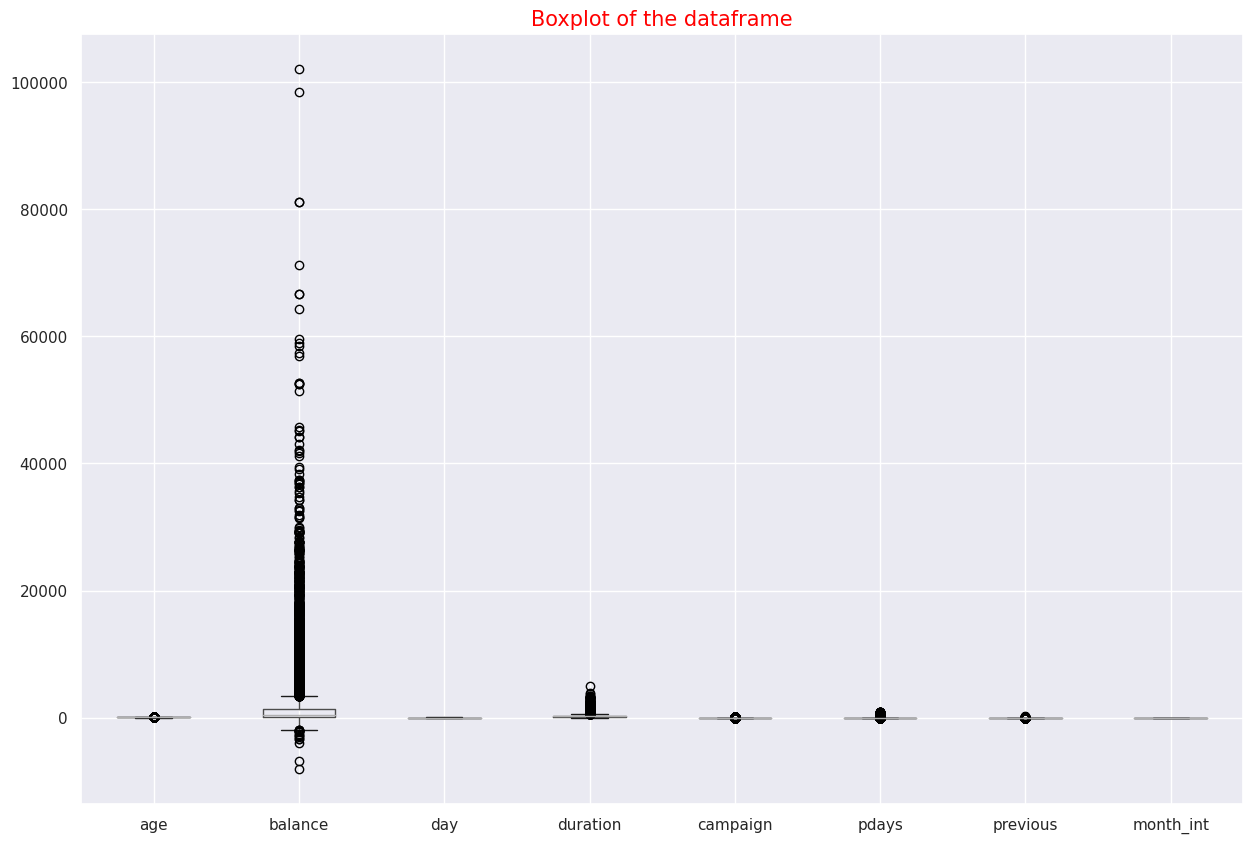

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.title("Boxplot of the dataframe", color='red',fontsize = 15)
print()

We can see that balance feature has some outliers in uper side that may cause some trouble in predictive model.

In [ ]:
# getting the Q! and Q3 quantiles
Q1 = np.percentile(df['balance'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['balance'], 75, interpolation = 'midpoint')

# calculating interquartile range
IQR = Q3-Q1

# finding the upper limit
upper_lim = Q3+ (1.5*IQR)
upper_lim

<ipython-input-89-dc073a62a73a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['balance'], 25, interpolation = 'midpoint')
<ipython-input-89-dc073a62a73a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['balance'], 75, interpolation = 'midpoint')


3462.0

As per the age distribution and IQR, the upper limit for values in balance is 3500 (approx), but logically there maybe variations in client's balance so we have taken an assumed upper limit of 5000

We will remove records which are above this limit, but to ensure we did not loose our already less proportion of "Yes" in data, we only remove outliers which have not subscribed and keep others as it is.

In [ ]:
# storing index of the conditioned rows
drop_index = df[(df['balance']>5000) & (df['y']!='yes')].index

# we have to drop rows on basis of the given condition
df = df.drop(drop_index)

## **Preprocessing**

### *Feature Engineering*

Logically, days from 1-30 does not have any ordinal weight so, we have to transform day numbers into week number, so that we can input model the category it belogs to and gave us better results.  

We assume an approximation that a month has 4 weeks and 1-7 is week 1, then 7-14 is week 2, then 14-21 is week 3 and morethan 21 is week 4

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
# creting fucntion to convert day to week number of a month.
def day_to_week(day):
  if day <=7:
    return 'week_1'
  elif day <=14:
    return 'week_2'
  elif day <=21:
    return 'week_3'
  else:
    return 'week_4'


# applying the function to all days
df['week_number'] = df.loc[:,'day'].apply(day_to_week)

In [ ]:
# creating function to convert calls times into categories
def previous(call):
  if call == 0:
    return 'not_contacted'

  elif call < 5:
    return 'call_less_thn_5'

  else:
    return 'call_more_thn_5'

# updating values using the function
df['previous'] = df.loc[:,'previous'].apply(previous)

In [ ]:
# creating function to convert month number into quarter.
def quarter_converter(month):
  if month <=3:
    return 'Q_1'

  elif month <=6:
    return 'Q_2'

  elif month <=9:
    return 'Q_3'

  else:
    return 'Q_4'


df.loc[:,'month'] = df['month_int'].apply(quarter_converter)

###*Feature encoding*

In [ ]:
# encoded 0,1,2 for divorced, single and married
df['marital'] = df['marital'].map({'divorced':0, 'single':1, 'married':2})

# encoded education feature as its carries an ordinal weight
df['education'] = df['education'].map({'other':0, 'primary':1, 'secondary':2, 'tertiary':3})

# encoding yes and no of housing and loan
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df['loan'] = df['loan'].map({'no':0, 'yes':1})

# Encoding Target variable
df['y'] = df['y'].map({'no':0, 'yes':1})

# Dropping unimportant feature, as we created alternative
df = df.drop(['default', 'month_int', 'pdays'], axis=1)

We have to drop default feature becasue from our EDA, this feature has 90% values as 'no' and it does not impact our subscription rate(target variable)

In [ ]:
df.head(7)

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y,week_number,month
0,58,management,2,3,2143,1,0,other,5,261,1,not_contacted,nonexistant,0,week_1,Q_2
1,44,technician,1,2,29,1,0,other,5,151,1,not_contacted,nonexistant,0,week_1,Q_2
2,33,entrepreneur,2,2,2,1,1,other,5,76,1,not_contacted,nonexistant,0,week_1,Q_2
3,47,blue-collar,2,0,1506,1,0,other,5,92,1,not_contacted,nonexistant,0,week_1,Q_2
4,33,other,1,0,1,0,0,other,5,198,1,not_contacted,nonexistant,0,week_1,Q_2
5,35,management,2,3,231,1,0,other,5,139,1,not_contacted,nonexistant,0,week_1,Q_2
6,28,management,1,3,447,1,1,other,5,217,1,not_contacted,nonexistant,0,week_1,Q_2


### *Correlation and VIF calculation*

<ipython-input-97-8ba9eff5f760>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= abs(df.corr())


<Axes: >

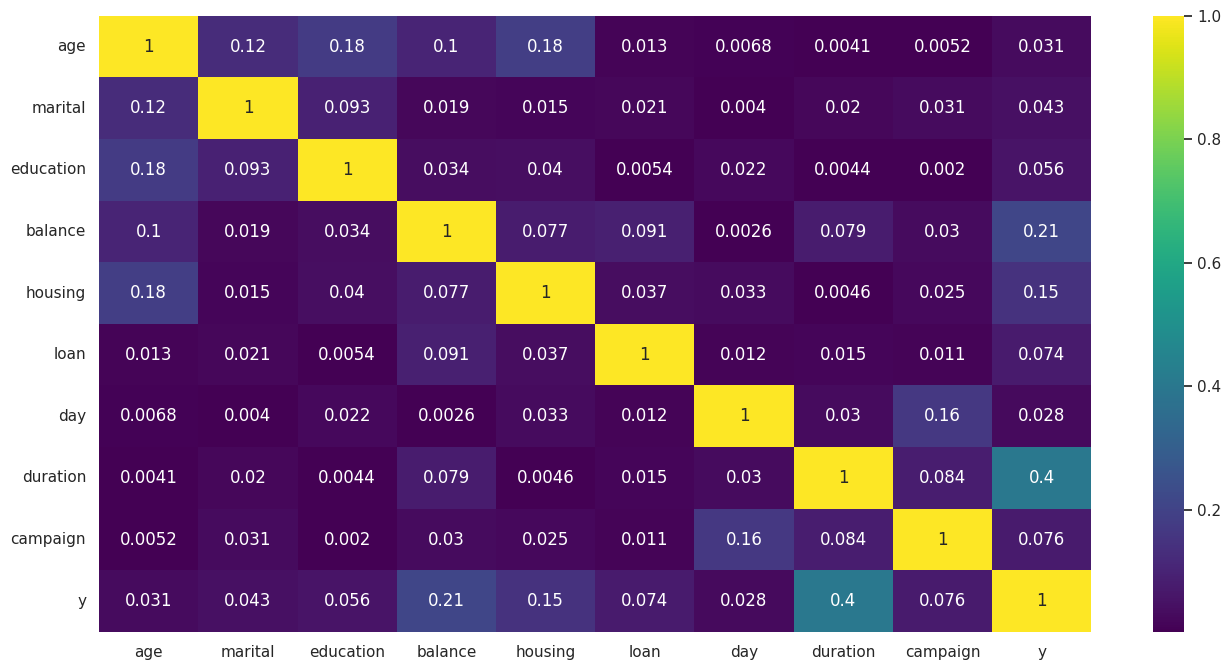

In [ ]:
corr= abs(df.corr())
matrix = np.triu(corr) # trimming the above triangle of matrix

# plotting it as the heatmap
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(corr,annot=True, cmap='viridis')

Not showing any special correlation with our taret feature, but as the data says duration is quite related with target and we only use this as benchmark model and cannot use this in the predictive model.

#### Checking VIF

In [ ]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating function for VIF calculation.
def cal_VIF(F):

   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]

   return(VIF)

In [ ]:
# calculating VIF for all numerical feature, except target variable-"y"

cal_VIF(df[[i for i in df.describe().columns if i !='y']])

,variables,VIF
0,age,8.790835
1,marital,5.216650
2,education,5.707764
3,balance,1.336584
4,housing,2.114747
5,loan,1.205323
6,day,4.332255
7,duration,1.970221
8,campaign,1.845800


The default threshold of VIF is 5 but it also depends case to case we have taken it as 10 and we see that none of the feature goes beyond 10 so we can go further with these features.

### *One Hot Encoding*

In [ ]:
# getting dummies using get dummies method of pandas
df = pd.get_dummies(df, drop_first=True)
df

,age,marital,education,balance,housing,loan,day,duration,campaign,y,...,previous_not_contacted,poutcome_nonexistant,poutcome_other,poutcome_success,week_number_week_2,week_number_week_3,week_number_week_4,month_Q_2,month_Q_3,month_Q_4
0,58,2,3,2143,1,0,5,261,1,0,...,1,1,0,0,0,0,0,1,0,0
1,44,1,2,29,1,0,5,151,1,0,...,1,1,0,0,0,0,0,1,0,0
2,33,2,2,2,1,1,5,76,1,0,...,1,1,0,0,0,0,0,1,0,0
3,47,2,0,1506,1,0,5,92,1,0,...,1,1,0,0,0,0,0,1,0,0
4,33,1,0,1,0,0,5,198,1,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,3,825,0,0,17,977,3,1,...,1,1,0,0,0,1,0,0,0,1
45207,71,0,1,1729,0,0,17,456,2,1,...,1,1,0,0,0,1,0,0,0,1
45208,72,2,2,5715,0,0,17,1127,5,1,...,0,0,0,1,0,1,0,0,0,1
45209,57,2,2,668,0,0,17,508,4,0,...,1,1,0,0,0,1,0,0,0,1


Our categories converted to column and are encoded with 0 or 1 values, moreover we have dropped first categories from all one hot encodings to remove multicollinearity.

## **Feature Selection/Feature Importance**

In [ ]:
# seperating dependent and independent variable
x = df.drop('y', axis=1)
y = df['y']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# selecting k best features using annova test
bestfeature = SelectKBest(f_classif, k=31)
fit = bestfeature.fit(x,y)

# converting the scores into dataframe for better presentation
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_col, df_score], axis=1)
feature_scores.columns = ['feature', 'score']

# lets see the important features
feature_scores.sort_values(by='score', ascending=False)

* We noticed here and already stated earlier that duration is directly impacting subscription rate, so here also its came out as the most important feature, we will use it to build an benchmark model.
* week_4, job_self_employed, job_other are the least important, so decided to remove these features.

* Since 'day' also has converted to weeks numbers and is less important so we can remove this also after our benchmark model.

In [ ]:
df = df.drop(['week_number_week_4','job_self-employed','job_other'], axis=1)

# seperating dependent and independent variable
x = df.drop('y', axis=1)
y = df['y']

### *Train-Test spit data*

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data with 64% as train and 36% as test data
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x, y, test_size=0.36, random_state=5, stratify=y)

print(x_train_o.shape, x_test_o.shape, '\n')
print(y_train_o.value_counts())

(27396, 30) (15411, 30) 

0    24011
1     3385
Name: y, dtype: int64


## Now there are two ways to proceed further:-
* Handling balance using Oversampling- SMOTEtomek
* Using Undersampling- Nearmiss


# **Handling Imbalance classes** - (Oversampling)

---



We see that our target labels have ratio of 8:1, so we are going to create additional synthetic labels based on nearest neighbour and distances, using the imblearn library.

In [ ]:
# using combination of smote and tomek-links to over and undersample data
from imblearn.combine import SMOTETomek

# defining smotetomek object
smo_tek = SMOTETomek(random_state=5)
x_train_smotek, y_train_smotek = smo_tek.fit_resample(x_train_o, y_train_o) #resampling training data and balance of class

print(x_train_smotek.shape, '\n')
print(y_train_smotek.value_counts())

(46754, 30) 

0    23377
1    23377
Name: y, dtype: int64


We have used SMOTE (Synthetic Minority Oversampling Technique) and Tommek links combination to oversample minority as well as undersample majority class to create a balance in classes using this imblearn library.

Now that we have handled the class balance, we can go further in process to scale the features.

### *Feature Scaling*

In [ ]:
from sklearn.preprocessing import StandardScaler

# using the standard scaler from sklearn to standardize the features
scaler = StandardScaler()
x_train_sm = scaler.fit_transform(x_train_smotek)
x_test_sm = scaler.transform(x_test_o)

y_train_sm = y_train_smotek #correcting the names for less confusion
y_test_sm = y_test_o

## **Model Building**

*Benchmark Model*

* **Logistic Regression** - Benchmark model with "duration" feature

We build a Logistic regression model to set a Benchmark with the highly related feature which has no importance in realistic predictive model. so if we want to build a realistic predictive modle we have to remove "duration" and we use this average AUC-ROC score to validate when we build further models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

seed = np.random.seed(1)

# applying kfold cross validation
k_fold_val = KFold(10)

# using logistic regression
lr = LogisticRegression(random_state=6, max_iter=150)

# storing cross validation scores
score = cross_val_score(lr, x_train_sm, y_train_sm, cv=k_fold_val, scoring='accuracy')

print(score, '\n')
print(f'Average cross validation Accuracy score is {score.mean()}')

[0.86377246 0.87467921 0.86847733 0.86719418 0.86973262 0.9026738
 0.97411765 0.9715508  0.97304813 0.96641711] 

Average cross validation Accuracy score is 0.9131663289158887


We have found approx 91% accuracy considering "duration" and with LogisticRegression a baseline model. we have used accuracy not AUC as score because remember we've balanced our data using SMOTE and its no longer have imbalanced labels.

Lets now remove the "duration" and "day" feature then will move further to create a realistic predictive models.

In [ ]:
f_features = x_train_smotek.drop(['day', 'duration'], axis=1).columns

# removing the 'day' and 'duration' feature from x_train and x_test
x_train_sm = np.delete(x_train_sm, [6,7], 1) # its presented in the 7th index and axis is 1
x_test_sm = np.delete(x_test_sm, [6,7], 1)

A function to get full classification result at one go.

In [ ]:
def get_report(y_true, y_pred):
  '''This function provides required classification report of model performance
  weather on test or train data'''

  # classificaation report from sklearn library
  cr = metrics.classification_report(y_true, y_pred)
  print(cr, '\n''\n')


  # printing ROC-AUC score
  print(f'roc_auc_score = {metrics.roc_auc_score(y_true, y_pred)}')
  print('\n')


  # confusion matrix
  print('Confusion Matrix:-')
  cf_matrix = metrics.confusion_matrix(y_true, y_pred)
  ax= plt.subplot()
  sns.heatmap(cf_matrix, annot=True, fmt="g", ax=ax)
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['not_subscribed', 'subscribed']);
  ax.yaxis.set_ticklabels(['not_subscribed', 'subscribed']);
  plt.show()



def roc_auc_plot(y_true, y_pred):
  # code for plotting TPR and FPR rate, ROC_AUC curve
  fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right') #for legend
  plt.plot([0, 1], [0, 1],'r--') # average score
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  return plt.show()


First, creating a function for calclating ROC-AUC scores with different thresholds for compatible predictive model.

In [ ]:
# function takes classifier object, x and y as argument
def thresh_finder(classifier, x, y):

    score_df = pd.DataFrame() #creating empty dataframe
    true_probabilities = classifier.predict_proba(x)[:,1] #finding probabilities for each class
    thresholds = np.linspace(0,1,20) #storing different thresholds from 0 to 1

  # iterating through different thresholds
    for threshold in thresholds:
      y_predict_thres = (true_probabilities > threshold).astype(int) # creating binary class using thresholds

      # calculating roc auc scores for each threshold and appending to dataframe
      roc_auc_s = metrics.roc_auc_score(y, y_predict_thres)
      score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)

    # plotting the lineplot for the thresholds and scores
    ax= sns.lineplot(x='threshold', y='roc_auc', data=score_df)
    # annotating the max value of scores when given threshold
    ymax = max(score_df['roc_auc'].values)
    xpos = np.where(score_df['roc_auc'].values == ymax)
    xmax = score_df['threshold'].values[xpos]
    ax.annotate('Threshold value = (%.3f)'%(xmax), xy=(xmax, ymax), xytext=(xmax, ymax + 0.005), arrowprops=dict(facecolor='black'))

    return plt.show()





# Defining a function to calculate all scores at once

def all_scores(y, y_pred):

  # calculating different scores
  roc_auc = metrics.roc_auc_score(y, y_pred)

  f1_score = metrics.f1_score(y, y_pred)

  recall = metrics.recall_score(y, y_pred)

  mat_corr_coef = metrics.matthews_corrcoef(y, y_pred)


  # getting all results as a tuple
  scores = roc_auc, f1_score, recall, mat_corr_coef

  return scores

### ***Predictive Models*** {for Upsampled data)

Models using:
* Random Forest Classifier
* Naive Bayes Classifier

Evaluating Metrics:
* AUC-ROC Score
* F-1 Score
* Recall
* Matthews Correlation Coefficient

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     13507
           1       0.31      0.60      0.41      1904

    accuracy                           0.78     15411
   macro avg       0.62      0.71      0.64     15411
weighted avg       0.86      0.78      0.81     15411
 


roc_auc_score = 0.705469401797885


Confusion Matrix:-


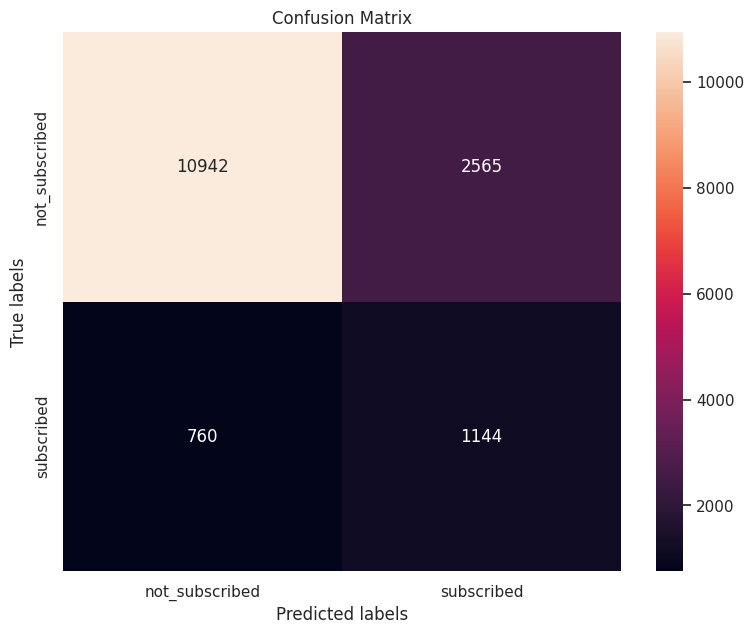

In [ ]:
#creation of random forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# set a random seed
seed = np.random.seed(1)

#hyperparameters dictionary
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 3}]
}

# hyperparameter tuning using random search
rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         n_iter=30)

# fitting training data
rf_gs = rf2.fit(x_train_sm, y_train_sm)

#predicting test data
rf_test = rf_gs.predict(x_test_sm)

# storing all scores using our function
rf_scores = all_scores(y_test_sm, rf_test)

get_report(y_test_sm, rf_test) #classification report


Now let's vizualize the AUC-ROC scores w.r.t different thresholds to find out the best which gives us highest score for the given model.

<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold':

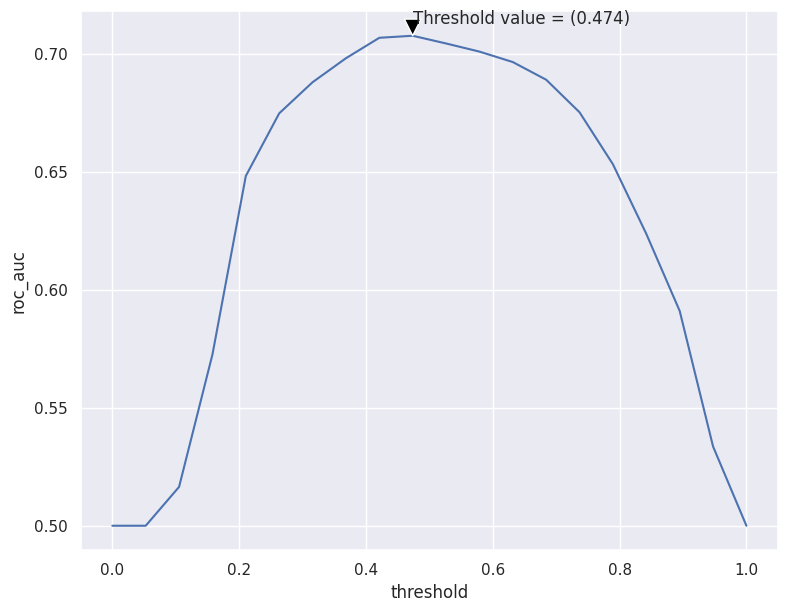

In [ ]:
thresh_finder(rf_gs, x_test_sm, y_test_sm)

This plot confirms that 0.5 is the best threshold to use for this model prediction, this plot helps us increasing our AUC-ROC scores by tuning the threshold that gives us high scores.

* Here, we can tune the hyperparameters as well as the threshold value of predictive probabiltiy to defined a class, this depends on the usecase, we can focus what we want to increase and decrease False positives or False negetives.

* with help of threshold tuning we reduced our false negetives, because in our usecase if client is not likely to get subscribed but is targeted by marketing team will not cost us much, but in alternate scenario we may loose our potential client.

#### Feature importance (Random forest)

<BarContainer object of 28 artists>

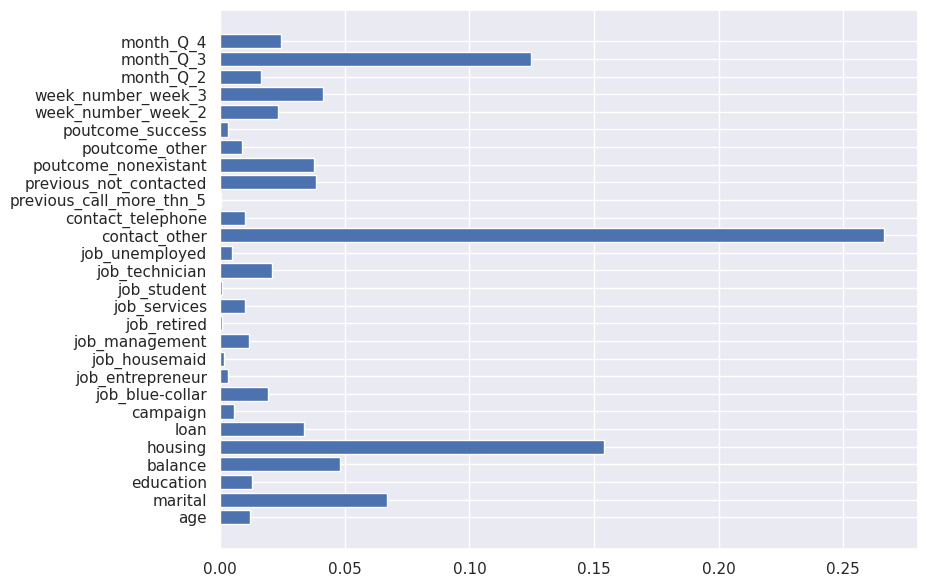

In [ ]:
# fitting random forest with the best parameters to find feature importance
rf = RandomForestClassifier(**rf_gs.best_params_)
rf_model = rf.fit(x_train_sm, y_train_sm)

#plotting bargraph for feature importances
plt.barh(f_features, rf_model.feature_importances_)

Some of our feature engineered created are highly important.

## Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     13507
           1       0.26      0.44      0.32      1904

    accuracy                           0.77     15411
   macro avg       0.58      0.63      0.59     15411
weighted avg       0.83      0.77      0.80     15411
 


roc_auc_score = 0.6291367633527092


Confusion Matrix:-


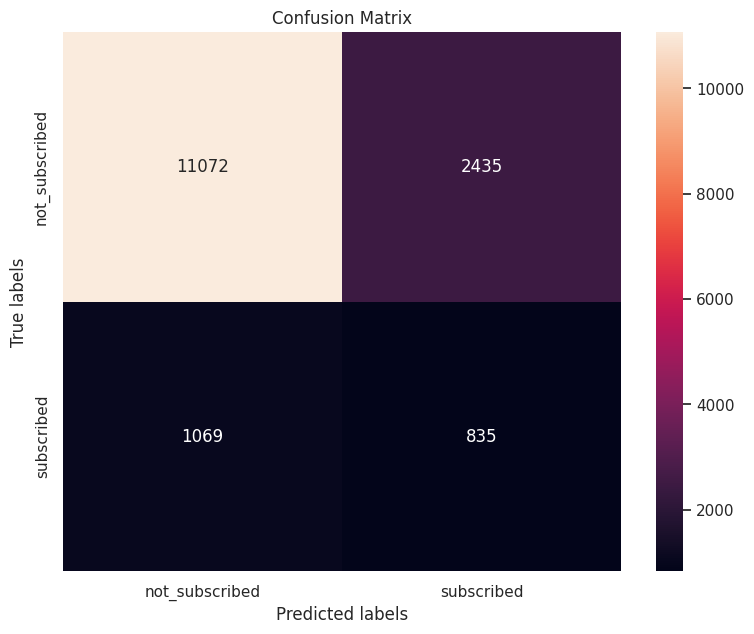

In [ ]:
from sklearn.naive_bayes import GaussianNB

seed = np.random.seed(1)

# creating naive bayes object
gnb = GaussianNB()
gnb.fit(x_train_sm, y_train_sm) #training

# making predictions on the testing set
y_pred = gnb.predict(x_test_sm)

nb_scores = all_scores(y_test_sm, y_pred) #storing scores

get_report(y_test_sm, y_pred) #classification report

<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold': threshold, 'roc_auc':roc_auc_s},ignore_index=True)
<ipython-input-46-d3bace1236e5>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'threshold':

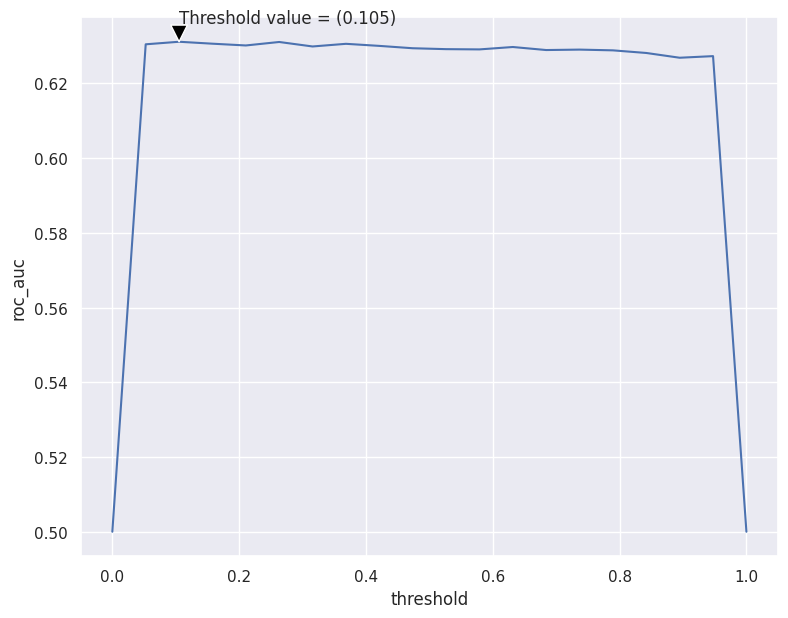

In [ ]:
thresh_finder(gnb, x_test_sm, y_test_sm)

Naive Bayes has high false negetive rate and its not predicting good results also thrsholds made no impact on score as this remain consistant.

In [ ]:
# creating dataframe of different scores
combined_scores = [rf_scores, nb_scores]
columns = ['auc-roc', 'F1_score', 'Recall', 'Matt_Corr_Coef']

upsample_scores = pd.DataFrame(combined_scores, columns=columns, index=['Random Forest', 'Naive Bayes'])

upsample_scores

,auc-roc,F1_score,Recall,Matt_Corr_Coef
Random Forest,0.705469,0.407625,0.60084,0.316324
Naive Bayes,0.629137,0.322768,0.43855,0.207870


Considering the SMOTE method for creating huge synthetic data, overall it doesn't give us desired output or predictions. these are some highlights that we conclude.

* The ROC-AUC score is averaged at 0.65 which is not optimum along with F-1 scores.
* Hyperparameter tuning is not being any effective with this SMOTE oversampled data.
* Tree based Random Forest ensemble technique helped us to get highest ROC-AUC score which is 0.71

Now we have to go for our 2nd option to use the undersampling technique as it seems to be more compatible with this data because this is large data and we may use undersampling to build a descent predictive model.   

# **Handling Imbalance classes** - (Undersampling)

Using the undersampling technique to balance training data and then scaling new data for model building

### Preprocessing (for undersampling)


In [ ]:
# using Nearmiss which reduce higherclass data using the average distances
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
x_train_un, y_train_un = undersample.fit_resample(x_train_o, y_train_o)

# using the standard scaler from sklearn to standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_un)
x_test = scaler.transform(x_test_o) #transforming original test set to scaled set

#correcting the names for less confusion
y_train = y_train_un
y_test = y_test_o


# removing the 'day' and 'duration' feature from x_train and x_test
x_train = np.delete(x_train, [6,7], 1) # its presented in the 6th and 7th index and axis is 1
x_test = np.delete(x_test, [6,7], 1)


# checking the counts of each class in the data
unique, frequency = np.unique(y_train, return_counts = True)

print(unique, '\n', frequency)

[0 1] 
 [3385 3385]


### ***Predictive Models*** {for Downsampled data}

Models using :
* K Nearest Neighbor
* XG Boost Classifier
* Support Vector Machine
* Neural Network

Evaluating Metrics:
* AUC-ROC Score
* F-1 Score
* Recall
* Matthews Correlation Coefficient

## K Nearest Neighbor Classifier

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     13507
           1       0.30      0.58      0.39      1904

    accuracy                           0.78     15411
   macro avg       0.62      0.69      0.63     15411
weighted avg       0.85      0.78      0.81     15411
 


roc_auc_score = 0.6938176469966088


Confusion Matrix:-


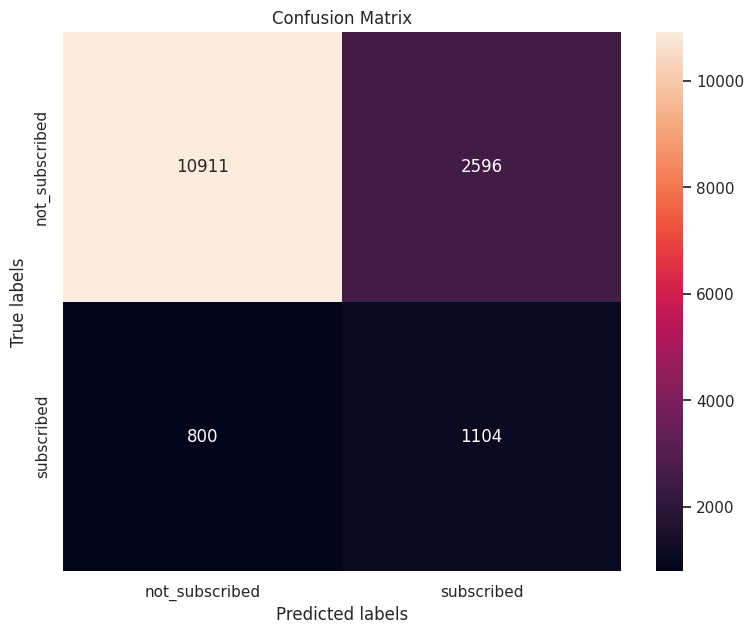

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

seed = np.random.seed(1)

#List Hyperparameters that we want to tune.
leaf_size = [7,8,9]
n_neighbors = [19,23]
algorithm = ['ball_tree', 'kd_tree']
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size,
                       n_neighbors=n_neighbors,
                       p=p, algorithm= algorithm)

knn = KNeighborsClassifier() #Create new KNN object
clf = HalvingGridSearchCV(knn, hyperparameters, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3) #Use HalvingGridSearch

knn_best_model = clf.fit(x_train,y_train) #Fit the model
kn_test = knn_best_model.predict(x_test) #predicting test labels

# calculating scores
knn_scores = all_scores(y_test, kn_test)

get_report(y_test, kn_test) #classification report

## XG Boost Classifier

              precision    recall  f1-score   support

           0       0.94      0.43      0.59     13507
           1       0.16      0.80      0.27      1904

    accuracy                           0.48     15411
   macro avg       0.55      0.61      0.43     15411
weighted avg       0.84      0.48      0.55     15411
 


roc_auc_score = 0.6141222758445201


Confusion Matrix:-


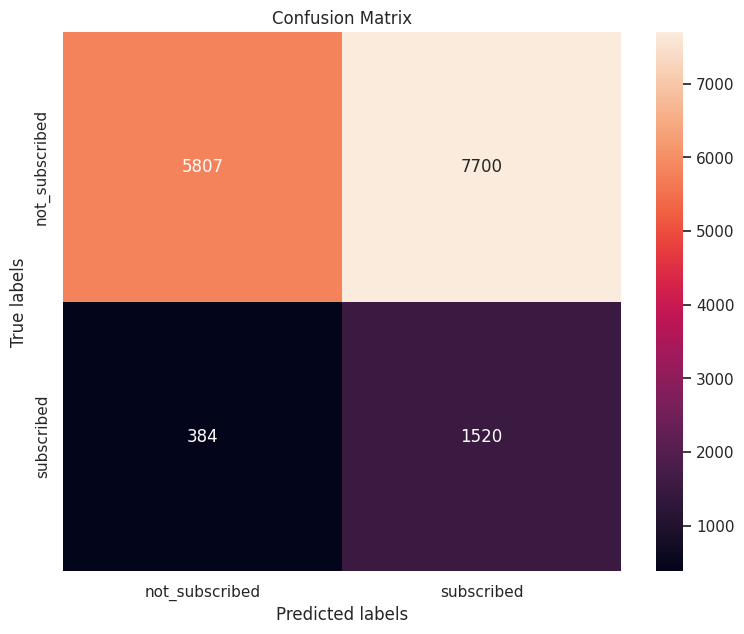

In [ ]:
import xgboost as xgb
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

seed = np.random.seed(1)

#classifier instance of current iteration
xgbc = xgb.XGBClassifier()


#setting grid of selected parameters for iteration
param_grid = {'gamma': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.300000012, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,100,140,210],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


#GridSearch instance of current iteration
clf = HalvingRandomSearchCV(estimator=xgbc, param_distributions=param_grid,
                            scoring='roc_auc', cv=2,
                            n_jobs=-1, factor=3)

clf.fit(x_train, y_train) # training model
xg_test = clf.predict(x_test) #predicting on test

xg_scores = all_scores(y_test, xg_test) #storing scores

get_report(y_test, xg_test) #classification report

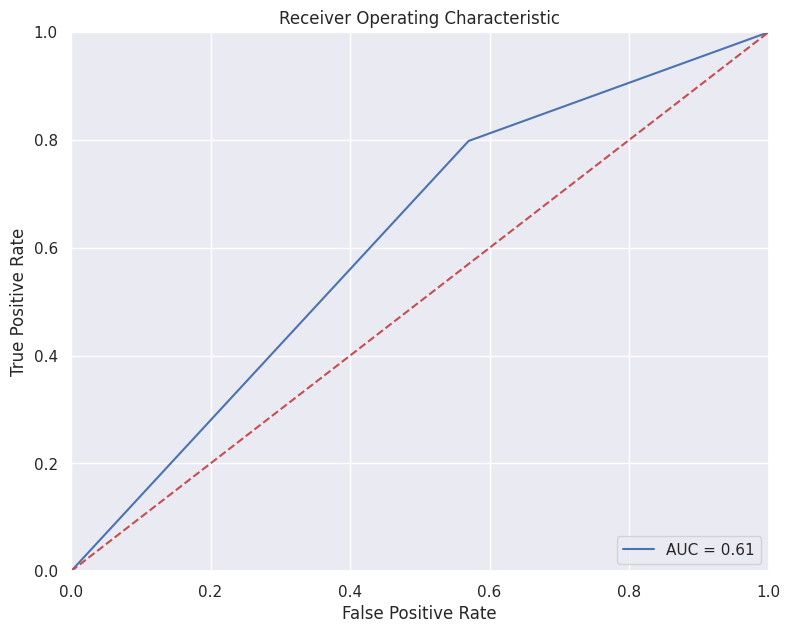

In [ ]:
# plotting auc_roc graph
roc_auc_plot(y_test, xg_test)

## Support Vector Classifier

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     13507
           1       0.21      0.72      0.32      1904

    accuracy                           0.62     15411
   macro avg       0.57      0.66      0.53     15411
weighted avg       0.85      0.62      0.69     15411
 


roc_auc_score = 0.6635094827891919


Confusion Matrix:-


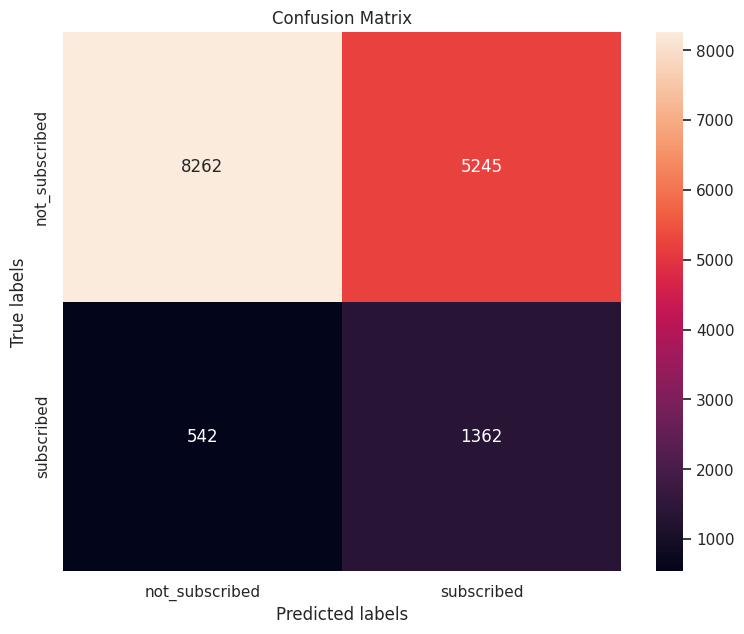

In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

seed = np.random.seed(1)


param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}


svc_grid = HalvingGridSearchCV(SVC(),param_grid,
                               refit=True,
                               min_resources='exhaust')
# fitting the model for grid search
svc_grid.fit(x_train,y_train)
sv_test = svc_grid.predict(x_test) #predicting test set

svm_scores = all_scores(y_test, sv_test) # storing scores

get_report(y_test, sv_test)

## Neural Network

Epoch 1/50
212/212 [==============================] - 1s 1ms/step - loss: 0.5654 - accuracy: 0.6990
Epoch 2/50
212/212 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7697
Epoch 3/50
212/212 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7978
Epoch 4/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7962
Epoch 5/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8044
Epoch 6/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8108
Epoch 7/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8043
Epoch 8/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8071
Epoch 9/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8064
Epoch 10/50
212/212 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8161

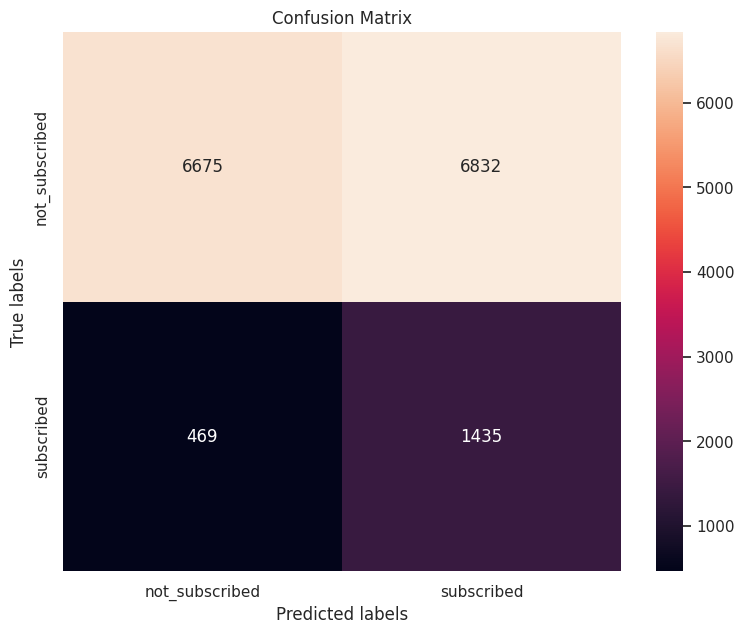

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

seed = np.random.seed(1)

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(31, input_dim=28, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.000002), activation='sigmoid'))#0035
    model.add(Dense(31, activation='tanh'))
    model.add(Dense(28, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    adam = Adam(learning_rate=0.0005)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model() # initiating the above function
# training the model to our function parameters
model.fit(x_train, y_train,epochs=50)
nn_test = model.predict(x_test) # predicting test

nn_t_pred = ((nn_test > 0.5)*1).flatten() # converting the predicted probability to labels

#storing the scores
nn_scores = all_scores(y_test, nn_t_pred)

get_report(y_test, nn_t_pred) # classificaion report

In [ ]:
# creating dataframe of different scores
combined_scores = [knn_scores, xg_scores, svm_scores, nn_scores]
columns = ['auc-roc', 'F1_score', 'Recall', 'Matt_Corr_Coef']

upsample_scores = pd.DataFrame(combined_scores, columns=columns, index=['K Neighbor Classifier', 'XG Boost', 'Support Vector Machine', 'Neural Network'])

upsample_scores

,auc-roc,F1_score,Recall,Matt_Corr_Coef
K Neighbor Classifier,0.693818,0.394004,0.579832,0.298633
XG Boost,0.614122,0.273283,0.798319,0.153203
Support Vector Machine,0.663509,0.320056,0.715336,0.217442
Neural Network,0.623932,0.282175,0.753676,0.163562


From the aggregate conclusion of scores, none of the classifiers can go beyond 70% in ROC_AUC score, but there are some thing which are highlighted here.

* Recall is highest in XG Boost model
* KNN works well in overall True and False positive rates thus has highest F1 score
* Hyperparameters helped us ot increase the score, and it worked better than default parameters.

## Model Selection

* The Matthew correlation coefficient serves as a comprehensive measure, considering TP, TN, FP, and FN. By observing the scores of Random Forest (with oversampling) and KNN (with undersampling), both models demonstrate good performance despite not relying heavily on correlated features.

* Regarding the ROC_AUC score, Random Forest achieved a solid 70%, indicating overall effective performance.

* If interpretability is a priority, Random Forest should be favored due to its tree-based structure, making it easier to explain nodes.

* To tackle the imbalanced data issue, an ensemble technique can be employed. By building different models using the same set of minority class data and aggregating the results, we can enhance TP, TN, and overall accuracy.

* Considering our evaluation metric is "Recall," which is essential for a marketing use case and reducing False Negatives, XG Boost emerges as the preferred choice as it offers the highest test Recall.







# **Conclusion**

Stakeholders in the banking and marketing domain, including banking institutions, marketing teams, and decision-makers, can draw several conclusions based on the effectiveness of their marketing efforts. These conclusions can guide future strategies and actions. Here are some possible conclusions:

* Identified Target Segments: By analyzing the marketing campaign results, stakeholders can conclude which customer segments or demographics are most responsive to their offers. This information allows for more targeted and personalized marketing efforts in the future.

* Campaign Effectiveness: Stakeholders can assess which marketing campaigns and channels have been the most effective in acquiring new customers or retaining existing ones. They can conclude which strategies provide the highest return on investment (ROI).




* Class imbalance poses a significant challenge in classification, but there are various techniques, such as 'Ensembling,' that can address this issue more effectively. Creating different models from diverse datasets and aggregating their results can be helpful. Continuously conducting experiments is the key to improvement, but we must recognize that limited resources and time have led us to our current conclusions.

* Recall has been our primary focus, aligning with the business use case. It takes precedence over precision because the predictive model's failure may lead to missed potential customers. Hence, our selection criterion is heavily influenced by the Recall score.

* While random oversampling can lead to conflicts and undesired outcomes when the majority class significantly outnumbers the minority class, synthetic data has shown some promise in improving results to a certain extent.

* Cost-Efficiency: Decision-makers can conclude which marketing channels are the most cost-efficient in terms of customer acquisition. This helps in optimizing marketing budgets and resource allocation.

#**In following ways this project is useful for stakeholders in the banking and marketing domain, including banking institution, marketing teams, and decision-makers:**

**1. Clear Communication:**

* Banking Institution: Keep shareholders and board members informed about the
financial health, strategic plans, and risk management of the institution.
* Marketing Teams: Regularly communicate marketing strategies, performance metrics, and campaign results to ensure alignment with business goals.
* Decision-Makers: Provide concise, data-driven reports and presentations to assist in informed decision-making.

**2. Customer Segmentation:**
* By identifying significant predictors such as previous loans, marital status, age, balance, contact month, and weeks played, stakeholders can gain a deeper understanding of their customer base. This understanding allows for better segmentation, enabling personalized marketing approaches tailored to different customer groups.

**3. Personalization:**

* Tailor financial products and services to meet individual customer needs, emphasizing personalized banking experiences.
* Segment target audiences and create personalized marketing campaigns to enhance customer engagement and conversion rates.

**4. Compliance and Risk Management:**

* Ensure compliance with regulatory requirements and maintain transparency in financial reporting to build trust with stakeholders.
* Understanding the factors that influence customer decisions to subscribe or not subscribe to the term deposit can also help stakeholders assess the risk associated with different customer segments.

**5. Imbalance class handling:**
  
  **Resampling Techniques:**
* Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
Methods like Synthetic Minority Over-sampling Technique (SMOTE) can be effective for generating synthetic examples.
* Undersampling: Decrease the number of instances in the majority class by randomly removing examples.
Be cautious with undersampling as it can lead to information loss.

**6. Competitive Analysis:**
* Keep stakeholders informed about the competitive landscape and potential market disruptions.
* Monitor competitors' marketing strategies and adjust tactics accordingly.
Decision-Makers: Present competitive analysis to guide strategic decisions and maintain market relevance.

**7. Customer Feedback:**

* Collect and act upon customer feedback to continuously improve products and services.
* Gather customer insights through surveys and feedback mechanisms to refine marketing approaches.



In summary, effective communication, personalization, compliance,Imbalance class handling, customer feedback, and competitive analysis are key strategies to engage stakeholders in the banking and marketing domain.By leveraging the predictive models and understanding the key predictors, stakeholders can enhance customer acquisition and retention strategies, leading to improved business outcomes.
